## Data Sourcing
  
  **Import Libraries:**
  - Import necessary Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data analysis and visualization.

  **Read Data:**
  - Read the loan dataset from a CSV file and convert it into a DataFrame.
  - Check the shape of the DataFrame.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the .csv file ,
df_bikes =pd.read_csv('day.csv',low_memory=False)
df_bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Quality Checks
  
  **Observations:**
  * No Null values


In [3]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preprocessing: Dropping Unnecessary Variables

  **Variable Removal:**

  The following variables were dropped for the specified reasons:
  
  1. 'instant': This variable represents the serial number of each record, which is not relevant for the analysis.
  
  2. 'dteday': This variable was deemed redundant because the required data for analysis is already contained in 'mnth' and 'yr'.
  
  3. 'casual' and 'registered': These two variables were dropped since their sum ('cnt') provides the total count of bike rentals, which is the target variable.



In [5]:
#These variables were dropped since instant is the just the serial number of the record, dteday is redundant coz 
#the required data for analysis is contained in mnth,yr casual + registered = cnt
df_bikes.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing Continuous Variables
  
  **Observations:**

  1. The count of bike rentals per day appears to increase with higher temperatures, both for the actual temperature (`temp`) and the adjusted temperature (`atemp`).

  2. `Temp` and `atemp` exhibit similar trends, suggesting a strong correlation between the two variables.

  3. In the `temp vs cnt` scatter plot, there are two outliers with values between 15 and 30 for `temp`.

  4. Similarly, in the `atemp vs cnt` scatter plot, two outliers are observed with values between 20 and 35 for `atemp`.

  5. The scatter plot `hum vs cnt` shows two outliers with values below 20 for humidity (`hum`).

  6. In the `windspeed vs cnt` scatter plot, there is one outlier with a value above 30 for windspeed.





<Figure size 2400x1600 with 0 Axes>

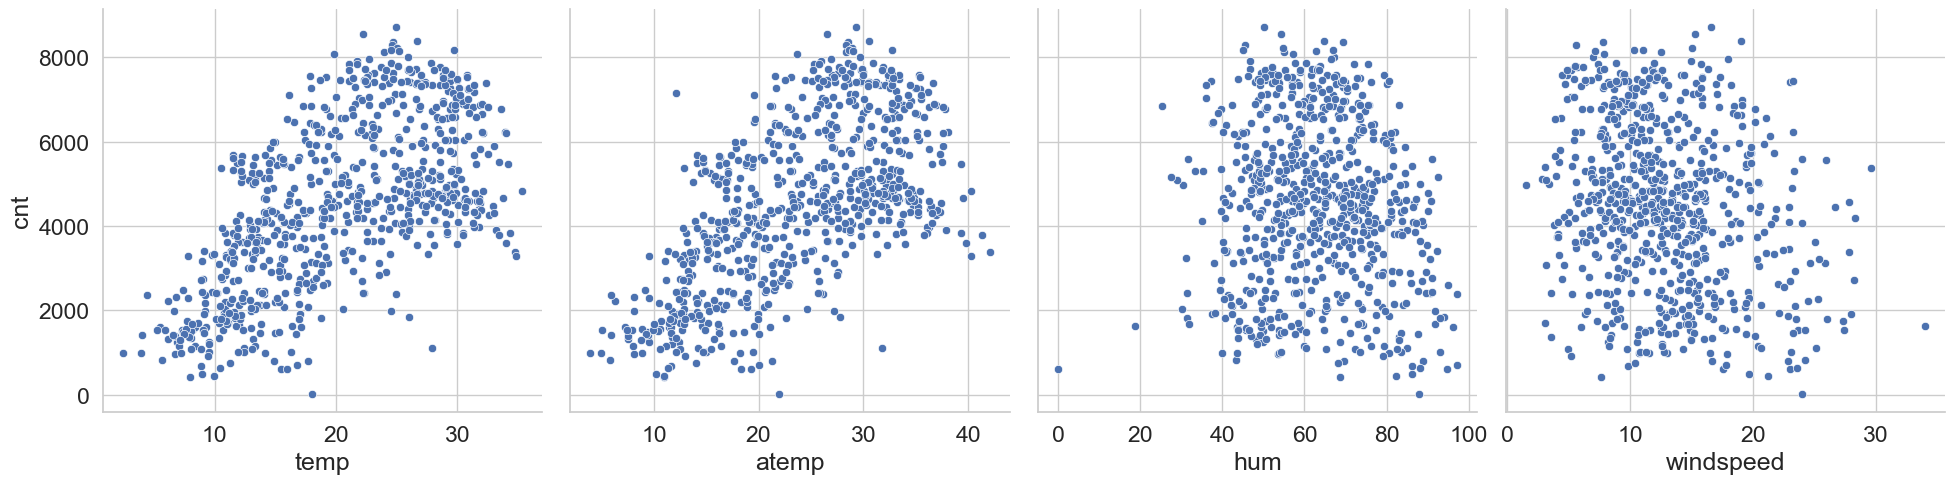

In [6]:
# Scatter Plots of Continuous variables vs 'cnt'
# Increase the figure size
plt.figure(figsize=(24, 16))

# Set the font scale to increase the font size
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.pairplot(data=df_bikes,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()

## Removing Outliers from Continuous Variables

  **Outliers Removal:**

  1. Remove outliers from the 'temp' column:
     - Remove rows where 'temp' is greater than 15 and less than 20, and 'count' (bike rentals) is less than 100.
     - Remove rows where 'temp' is greater than 25 and less than 30, and 'count' is less than 2000.

  2. Remove outliers from the 'atemp' column:
     - Remove rows where 'atemp' is greater than 20 and less than 25, and 'count' is less than 100.
     - Remove rows where 'atemp' is greater than 30 and less than 35, and 'count' is less than 2000.

  3. Remove outliers from the 'hum' (humidity) column:
     - Remove rows where 'hum' is less than 20.

  4. Remove outliers from the 'windspeed' column:
     - Remove rows where 'windspeed' is greater than 30.



In [7]:
## Dropping outliers in continuous variables
# outliers in temp
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['temp'] > 15) & (df_bikes['temp'] < 20) & (df_bikes['cnt'] < 100)].index)
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['temp'] > 25) & (df_bikes['temp'] < 30) & (df_bikes['cnt'] < 2000)].index)

# outliers in atemp
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['atemp'] > 20) & (df_bikes['atemp'] < 25) & (df_bikes['cnt'] < 100)].index)
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['atemp'] > 30) & (df_bikes['atemp'] < 35) & (df_bikes['cnt'] < 2000)].index)


#outliers in hum
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['hum'] < 20)].index)

#outliers in windspeed
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['windspeed'] > 30)].index)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Correlation Analysis with Continuous Variables

  **Observations:**

  When examining the correlation between selected continuous variables and the count of bike rentals ('cnt'), the following observations were made:

  1. 'atemp' (adjusted temperature) exhibits the highest positive correlation with 'cnt,' indicating that as the adjusted temperature increases, the count of bike rentals tends to increase as well.

  2. 'temp' (temperature) also shows a positive correlation with 'cnt,' although slightly lower than 'atemp.'

  3. 'hum' (humidity) has the lowest correlation with 'cnt,' suggesting that changes in humidity have a weaker impact on bike rental counts.

  4. Notably, the correlation between 'temp' and 'atemp' is nearly 1, indicating a very strong positive linear relationship. As a result, considering their high correlation, it may be advisable to drop one of these variables to avoid multicollinearity in subsequent analyses.



In [8]:
df_bikes[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991726,0.122673,-0.160295,0.635560
atemp,0.991726,1.000000,0.136886,-0.186807,0.638918
hum,0.122673,0.136886,1.000000,-0.247498,-0.107622
windspeed,-0.160295,-0.186807,-0.247498,1.000000,-0.218150
cnt,0.635560,0.638918,-0.107622,-0.218150,1.000000


In [9]:
# dropping atemp
df_bikes = df_bikes.drop(columns=['atemp'])
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### After droping atemp check Correlation with Continuous Variables

  **Observation:**

  - There's no signifcant correlation between atemp and hum , windspeed.
  - Hence these are not dropped for now.



In [10]:
df_bikes[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


### Preparing data for modeling

## Data Preprocessing: Categorizing Columns

  **Categorization:**

  - mnth: Categorized into months from January to December.
  - season: Categorized into four levels, namely Spring, Summer, Fall, and Winter.
  - weathersit: Categorized into four levels, including Clear, Mist, Light Snow, and Heavy Rain.
  - weekday: Categorized into days of the week, including Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed), Thursday (Thu), Friday (Fri), and Saturday (Sat).

In [11]:
df_bikes['weathersit'] = df_bikes.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
df_bikes['season'] = df_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bikes['mnth']=df_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_bikes['weekday']=df_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Visualizing Categorical Variables
  
  **Observations:**

  1. From the "Season vs. Rentals per Day" plot, it's evident that fall has the highest average rentals, followed by summer.

  2. When looking at year-by-year rentals, 2019 shows a median increase of 2,000 rentals compared to 2018.

  3. The "Month-wise Rentals" plot reveals that September has the highest rentals, followed by the two surrounding months, which suggests a seasonal trend.

  4. On holidays, rental counts are generally lower compared to working days, with greater variability in demand on holidays.

  5. There is no significant difference in rentals based on weekdays, except that Thursdays and Sundays exhibit higher variations in rentals compared to other days.




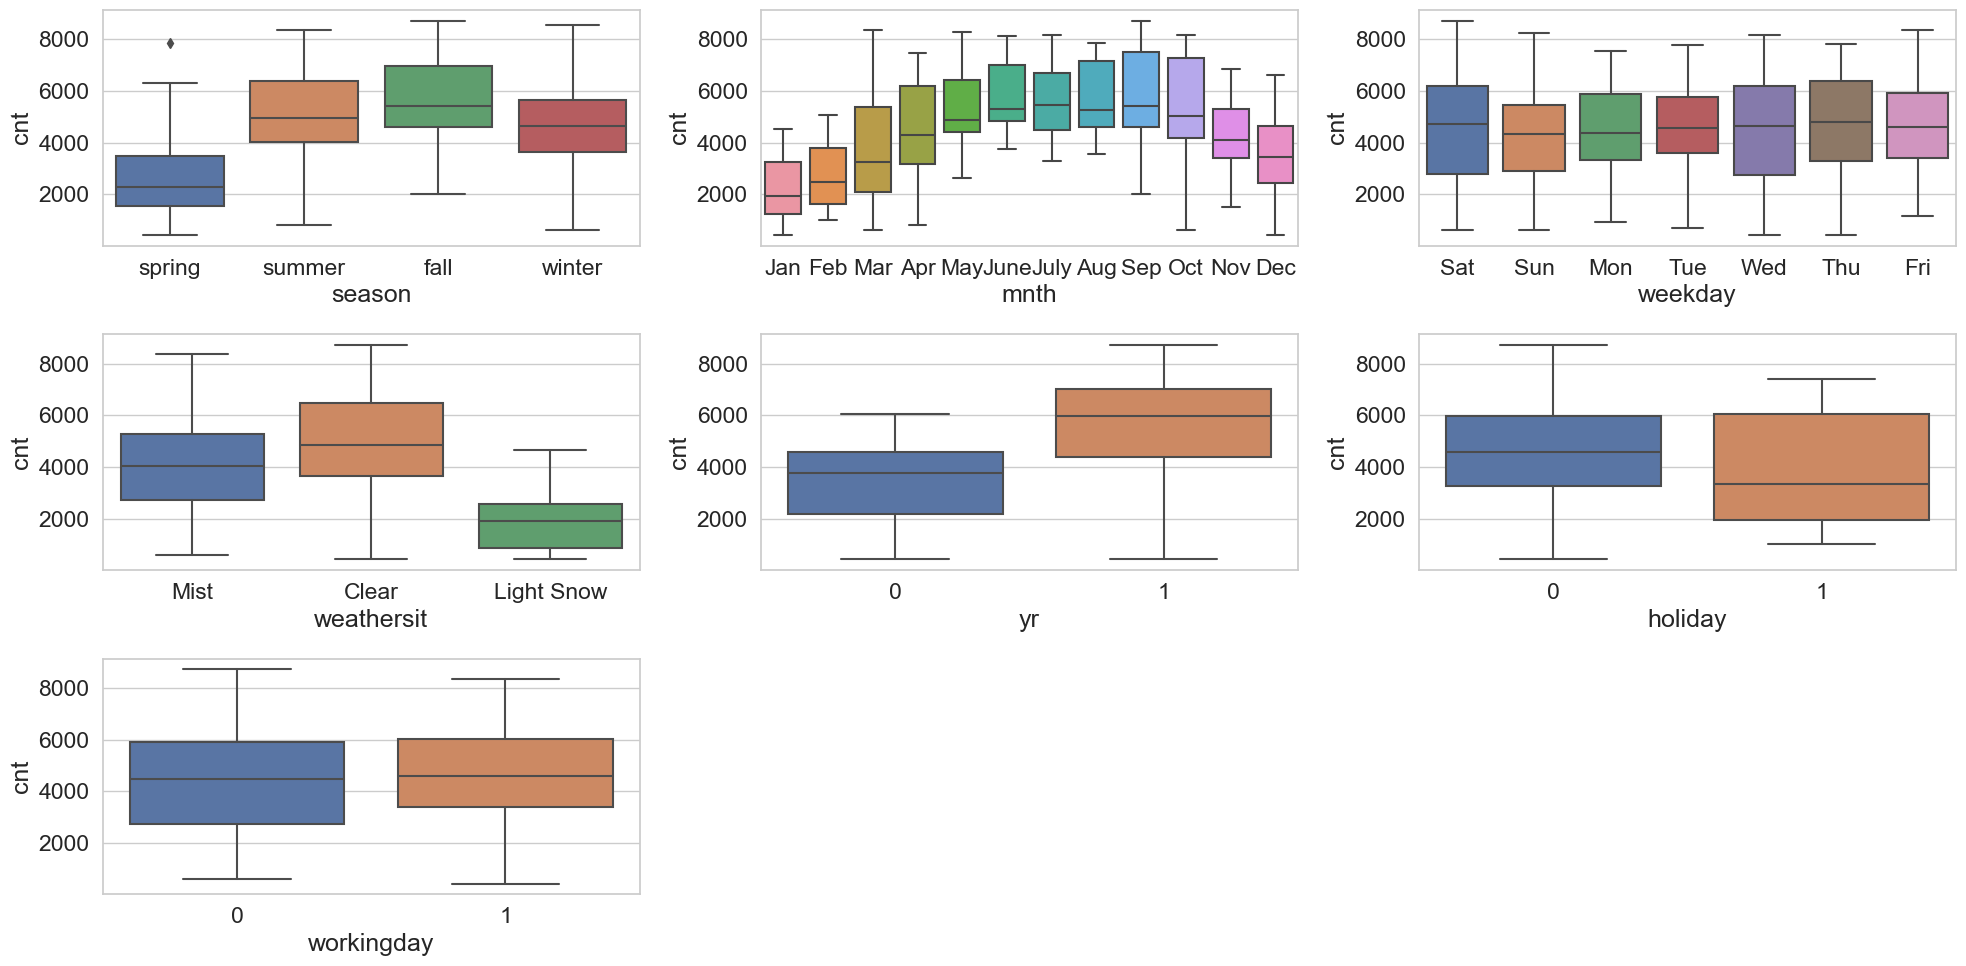

In [12]:
# Create a figure with 2 rows and 4 columns of subplots
plt.figure(figsize=(20, 10))

# Subplot 1: Season
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df_bikes)

# Subplot 2: Month
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df_bikes)

# Subplot 3: Weekday
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=df_bikes)

# Subplot 4: Weather Situation
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_bikes)

# Subplot 5: Year
plt.subplot(3, 3, 5)
sns.boxplot(x='yr', y='cnt', data=df_bikes)

# Subplot 6: Holiday
plt.subplot(3, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=df_bikes)

# Subplot 7: Working Day
plt.subplot(3, 3, 7)
sns.boxplot(x='workingday', y='cnt', data=df_bikes)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Data Preprocessing: Removing Outliers in Categorical Variables

  **Outlier Removal:**
  
  - Rows where 'season' is equal to 'spring' and 'cnt' (count of bike rentals) is greater than 7000



In [13]:
# Dropping outliers in Categorical Variables 
df_bikes.drop(df_bikes[(df_bikes['season'] == 'spring') & (df_bikes['cnt'] > 7000)].index)
df_bikes['cnt'] > 7000

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Name: cnt, Length: 725, dtype: bool

## Data Visualization: Correlation Analysis

  **Observations:**

  In the correlation analysis, it was observed that the variable 'temp' has the highest positive correlation with 'cnt,' followed by 'yr.'




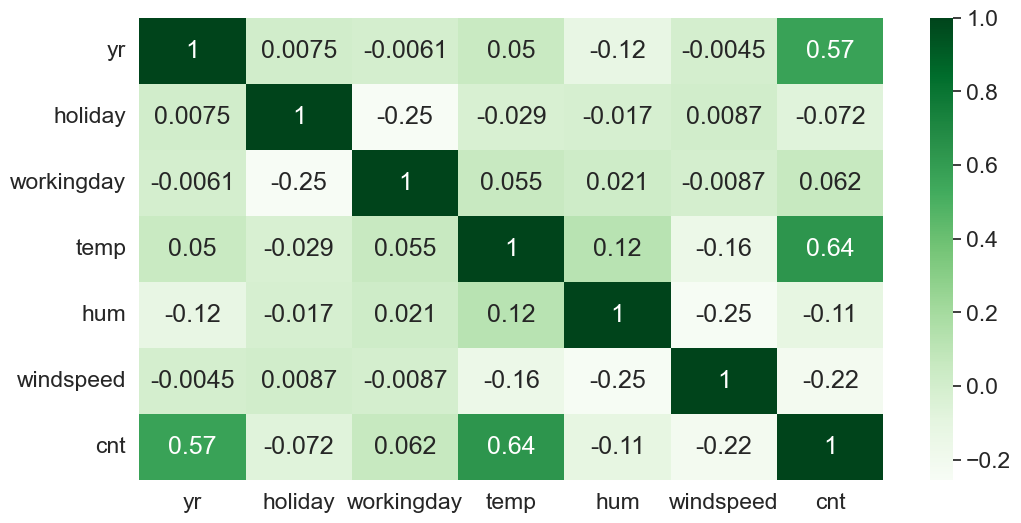

In [14]:
# Heatmap to check correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(df_bikes.corr(),annot=True,cmap='Greens')
plt.show()

## Data Preprocessing: Creating Dummy Variables for Categorical Features

  **Creating Dummy Variables:**

  To handle categorical variables like 'season', 'mnth', 'weekday', and 'weathersit', dummy variables are created. This is done to convert categorical data into a numerical format suitable for analysis.

  - 'season_indicators': Dummy variables are generated for the 'season' column with one-hot encoding, and the first category is dropped to avoid multicollinearity.
  
  - 'mnth_indicators': Similarly, dummy variables are created for the 'mnth' column.
  
  - 'weekday_indicators': Dummy variables are generated for the 'weekday' column.
  
  - 'weathersit_indicators': Dummy variables are created for the 'weathersit' column.

  **Updating DataFrame:**

  - The newly created indicator variable columns are added to the 'df_bikes' DataFrame.
  
  - The original categorical columns ('season', 'mnth', 'weekday', 'weathersit') are dropped since they are no longer needed.



In [15]:
# We can see that Season and weathersit are having same kind of lables(1,2,3,4). 
# With the following simple one line of code it can automatically handles that kind of structure instead of converting labels to categorical variables. 
# creating indicator variable columns
season_indicators = pd.get_dummies(df_bikes['season'],drop_first=True)
mnth_indicators = pd.get_dummies(df_bikes['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(df_bikes['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(df_bikes['weathersit'],drop_first=True)

# adding indicator variable columns to the dataset . Dropping original columns
df_bikes = pd.concat([df_bikes,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
df_bikes = df_bikes.drop(columns=['season','mnth','weekday','weathersit'])

df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

## Data Splitting: Train-Test Split
  
  **Splitting the Dataset:**

- The dataset is split into two subsets: a training set and a test set. This division is essential for building and evaluating machine learning models.


In [17]:
Df_bikes_train,Df_bikes_Test=train_test_split(df_bikes,train_size=0.7,random_state=100)
print(Df_bikes_train.shape)
print(Df_bikes_Test.shape)

(507, 29)
(218, 29)


## Data Preprocessing: Scaling Numerical Variables

  **Scaling Procedure:**

  In this step, we perform Min-Max scaling on a subset of numerical variables, including 'temp,' 'hum,' and 'windspeed,' within the training data ('Df_bikes_train').



In [18]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']
numerical_scaler.fit(Df_bikes_train[num_vars])
Df_bikes_train[num_vars] = numerical_scaler.fit_transform(Df_bikes_train[num_vars])
Df_bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
641,1,0,1,0.745598,0.634311,0.227006,7328,0,0,1,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.283272,0.783361,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
478,1,0,1,0.441354,0.240538,0.541524,5633,0,1,0,...,0,0,0,0,0,0,1,0,0,0
113,0,0,0,0.651106,0.763125,0.405045,4191,0,1,0,...,0,0,0,0,1,0,0,0,0,1
685,1,0,0,0.331287,0.374237,0.375353,5629,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Checking Correlation in the Training Data
  
  **Observations:**
  
  In the correlation analysis of the training data, the following observations were made:
  
  - We can observe a strong positive correlation between the following variables and the count of rentals (`cnt`):
    - `temp`: The temperature appears to have a positive influence on bike rentals.
    - `year`: The year also shows a positive correlation with rental counts, indicating a potential year-to-year growth trend.


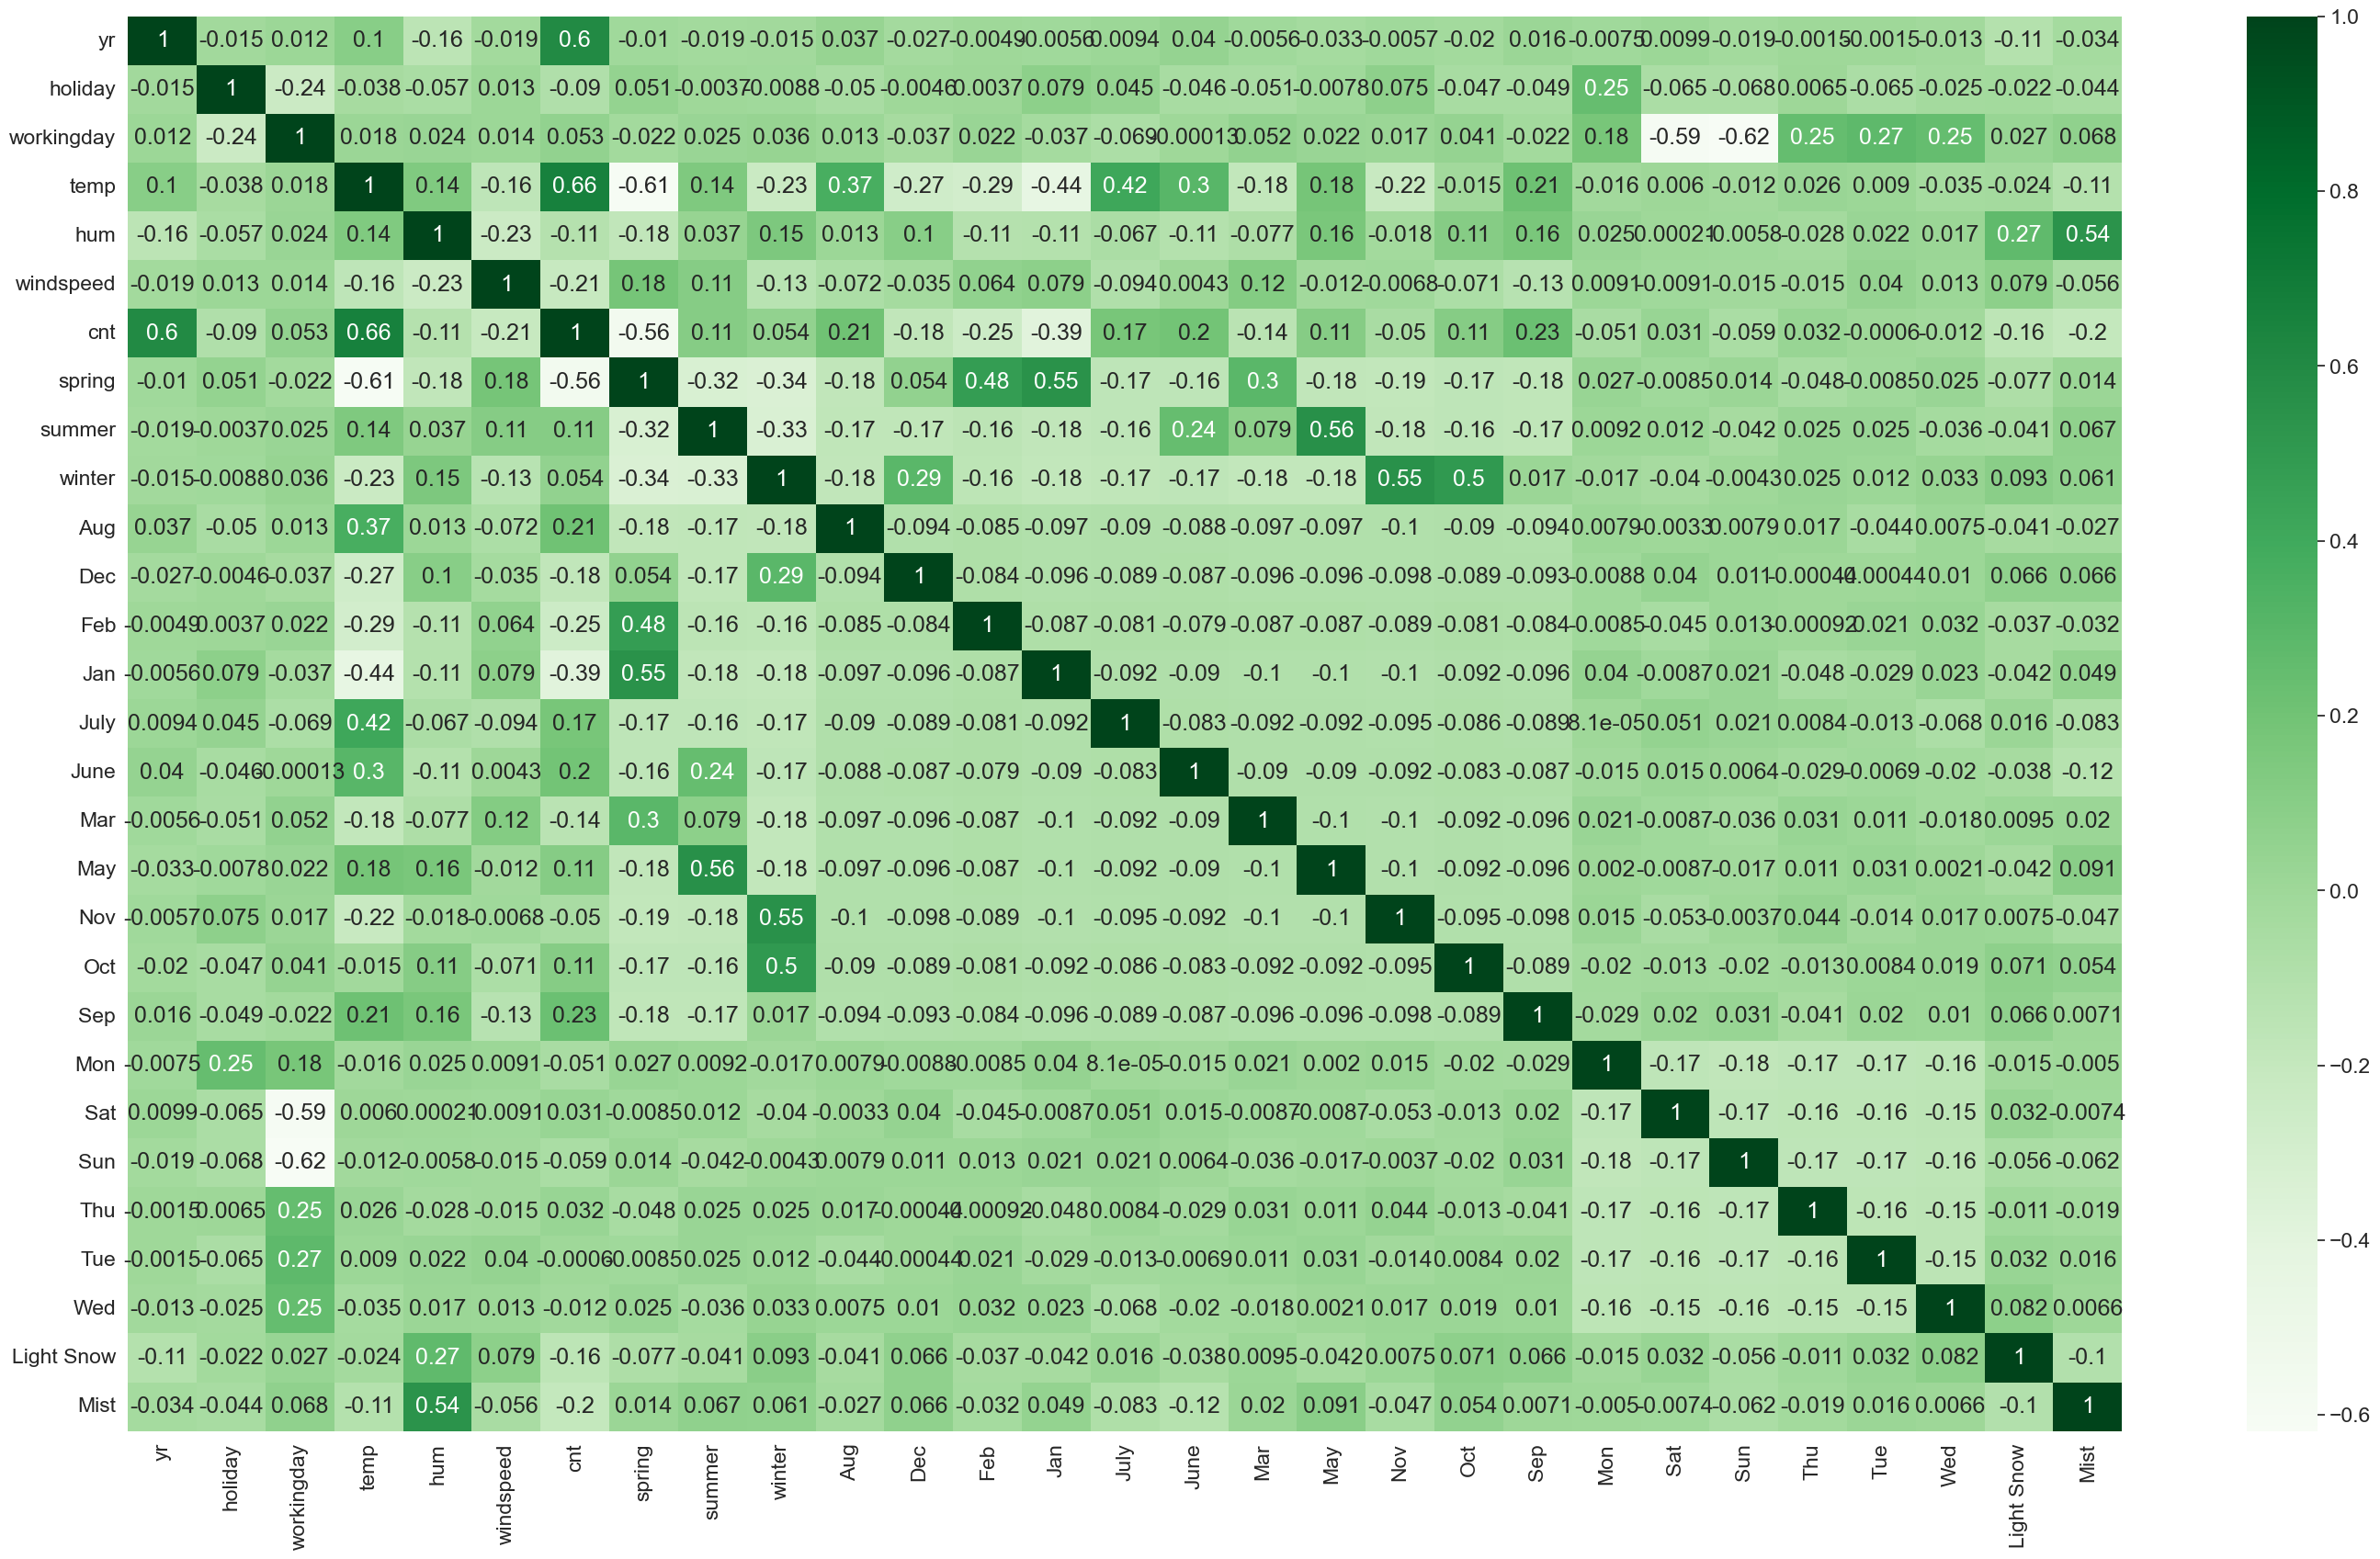

In [19]:
plt.figure(figsize = (35, 20))
sns.heatmap(Df_bikes_train.corr(), annot = True,cmap ='Greens')
plt.show()

##### Dividing independent and dependent variables

In [20]:
y_train = Df_bikes_train.pop('cnt')
X_train = Df_bikes_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
641,1,0,1,0.745598,0.634311,0.227006,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.283272,0.783361,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
478,1,0,1,0.441354,0.240538,0.541524,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
113,0,0,0,0.651106,0.763125,0.405045,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
685,1,0,0,0.331287,0.374237,0.375353,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Modelling Approach

  **Approach:**

  A mixed approach is employed for feature selection and model building.

  1. **Recursive Feature Elimination (RFE):**
  
     - The initial step involves selecting the 15 best columns using the Recursive Feature Elimination (RFE) method. RFE is a feature selection technique that recursively removes less important features based on their contribution to the model's performance.
  
  2. **P-Value Method:**
  
     - After the initial feature selection with RFE, further feature elimination is performed using the p-value method. This method assesses the statistical significance of each feature's contribution to the model and removes those with high p-values, indicating low significance.



In [21]:
# Selecting 15 Features using RFE 
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [22]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sun
21,1,True,Sat
19,1,True,Sep
17,1,True,Nov
26,1,True,Light Snow
10,1,True,Dec
8,1,True,winter
27,1,True,Mist
6,1,True,spring


In [23]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sun', 'Sat', 'Sep', 'Nov', 'Light Snow', 'Dec', 'winter',
       'Mist', 'spring', 'windspeed', 'hum', 'temp', 'workingday',
       'holiday'], dtype=object)

### Building model using statsmodel, for the detailed statistics

#### Manual Elimination using High P-Value and Low VIF

In [24]:
# Function for Ordinary Least Squares (OLS) Regression Fit
def ols_fit(y, X):
    
    # Add a constant term to the independent variables
    X_train_sm = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X_train_sm).fit()
    
    # Print the summary statistics of the regression
    print(model.summary())
    
    return model

# Function for Variance Inflation Factor (VIF) Calculation
def vif(X):
    
    # Add a constant term to the independent variables
    df = sm.add_constant(X)
    
    # Calculate the VIF for each independent variable
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Create a DataFrame to display VIF values
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    
    # Print the DataFrame, sorted by VIF values in descending order
    print(vif_frame.sort_values(by='vif', ascending=False))


## Model 1:
* Using features selected by RFE

In [25]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.66e-193
Time:                        19:46:30   Log-Likelihood:                -4079.3
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     492   BIC:                             8252.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1986.8185    182.021     10.915      0.0

## Model 2 :
Dropping holiday because of high p-value

In [26]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.66e-193
Time:                        19:46:30   Log-Likelihood:                -4079.3
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     492   BIC:                             8252.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2027.7312    306.449      6.617      0.0

## Model 3 :
Dropping Sunday because of high p-value

In [27]:
del_feature = 'Sun'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     215.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.56e-194
Time:                        19:46:30   Log-Likelihood:                -4080.6
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     493   BIC:                             8248.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.6069    234.075     10.008      0.0

## Verifying MultiCollinearity
  
  **Observation:**
  
  When assessing multicollinearity among the selected features, the following observations were made:

  1. The Variance Inflation Factor (VIF) for all selected features is less than 5. This indicates that there is no significant multicollinearity among these features. VIF values below 5 generally suggest that the predictor variables are not highly correlated with each other.

  2. Additionally, the comparison of R-squared and adjusted R-squared values also supports the absence of significant multicollinearity. When these two values are similar, it suggests that the inclusion of multiple predictor variables is not leading to overfitting or redundancy in the regression model.



In [28]:
vif(X_train[selected_features])

         index        vif
0        const  47.112510
12        temp   2.870132
9       spring   2.637464
7       winter   2.363436
11         hum   2.093160
4          Nov   1.777281
8         Mist   1.761907
13  workingday   1.573985
2          Sat   1.565518
6          Dec   1.356272
5   Light Snow   1.287967
10   windspeed   1.148956
3          Sep   1.104835
1           yr   1.066624


In [29]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     215.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.56e-194
Time:                        19:46:30   Log-Likelihood:                -4080.6
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     493   BIC:                             8248.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.6069    234.075     10.008      0.0

## <b>Model Summary:</b>

1. The R-squared value of the model is approximately 85%, indicating that 85% of the variance in the count quantity is explained by all the variables. The adjusted R-squared is 84.6%.

2. All the p-values of the features are less than 0.05, indicating that they are statistically significant in explaining the variation in the dependent variable.

3. The low Prob(F-statistic) suggests that the overall model is a good fit for the data.

4. The Variance Inflation Factor (VIF) for all the variables is generally less than 5, meeting the condition for multicollinearity.

### Residual Analysis
#### Observations:
- We can observed that the error terms follow a normal distribution.


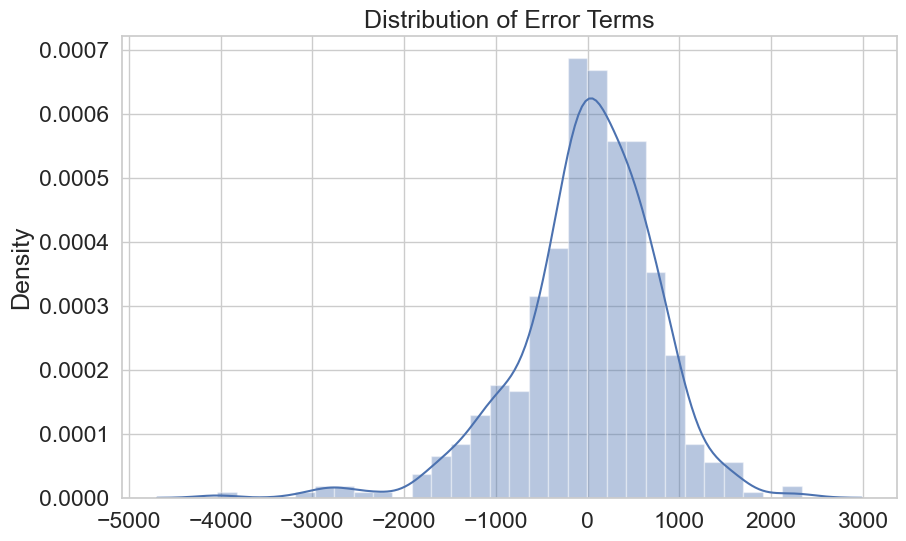

In [30]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig, ax = plt.subplots(figsize=(10, 6))

# Frequency Distribution of Residuals
ax.set(title='Distribution of Error Terms')
sns.distplot(y_train - y_train_pred, bins=30, ax=ax)

plt.show()


### Test Homoscedasticity
### Observations:
* We can observe that there is a constant deviation from the zero line, and there are no visible patterns in the error terms. So, this model fit looks good.

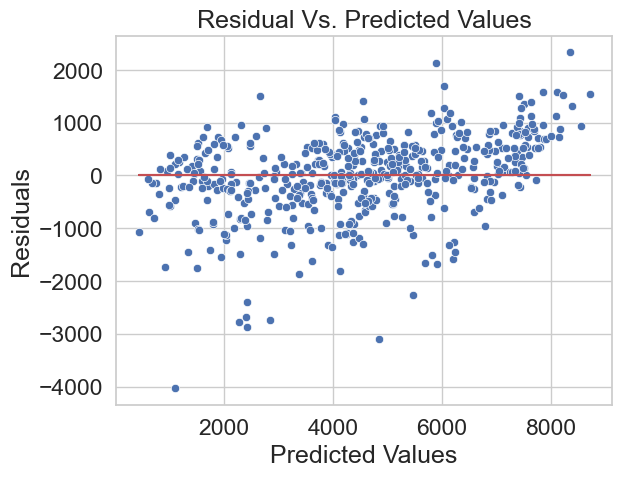

In [31]:
sns.scatterplot(x=y_train, y=y_train - y_train_pred)
plt.plot(y_train, [0] * len(y_train), '-r')
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Error term Trend verification
### Observations:
* Lagplot of residuals shows no trend. Hence the error terms have constant variance.

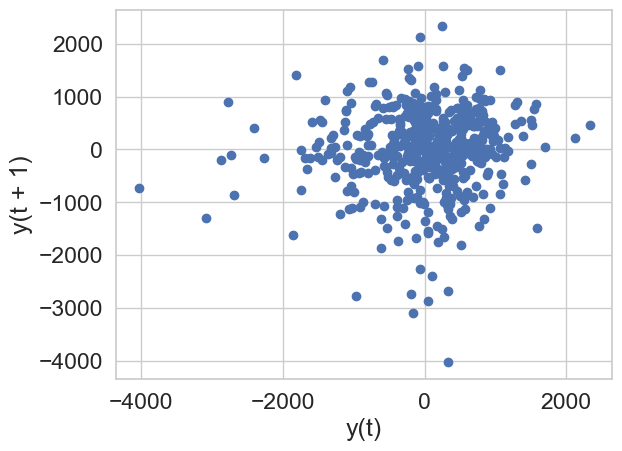

In [32]:
# lag plot to assess independence of data points
lag_plot(y_train-y_train_pred)
plt.show()

**Based on all of this analysis, we can confidently conclude that the assumptions of Linear Regression are met by this model.**


# Making Prediction:

In [33]:
y_test = Df_bikes_Test.pop('cnt')
X_test = Df_bikes_Test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [34]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

# Model Evaluation:
### Observations :
- Predicted vs observed value plots shows that the model is reasonably accurate.

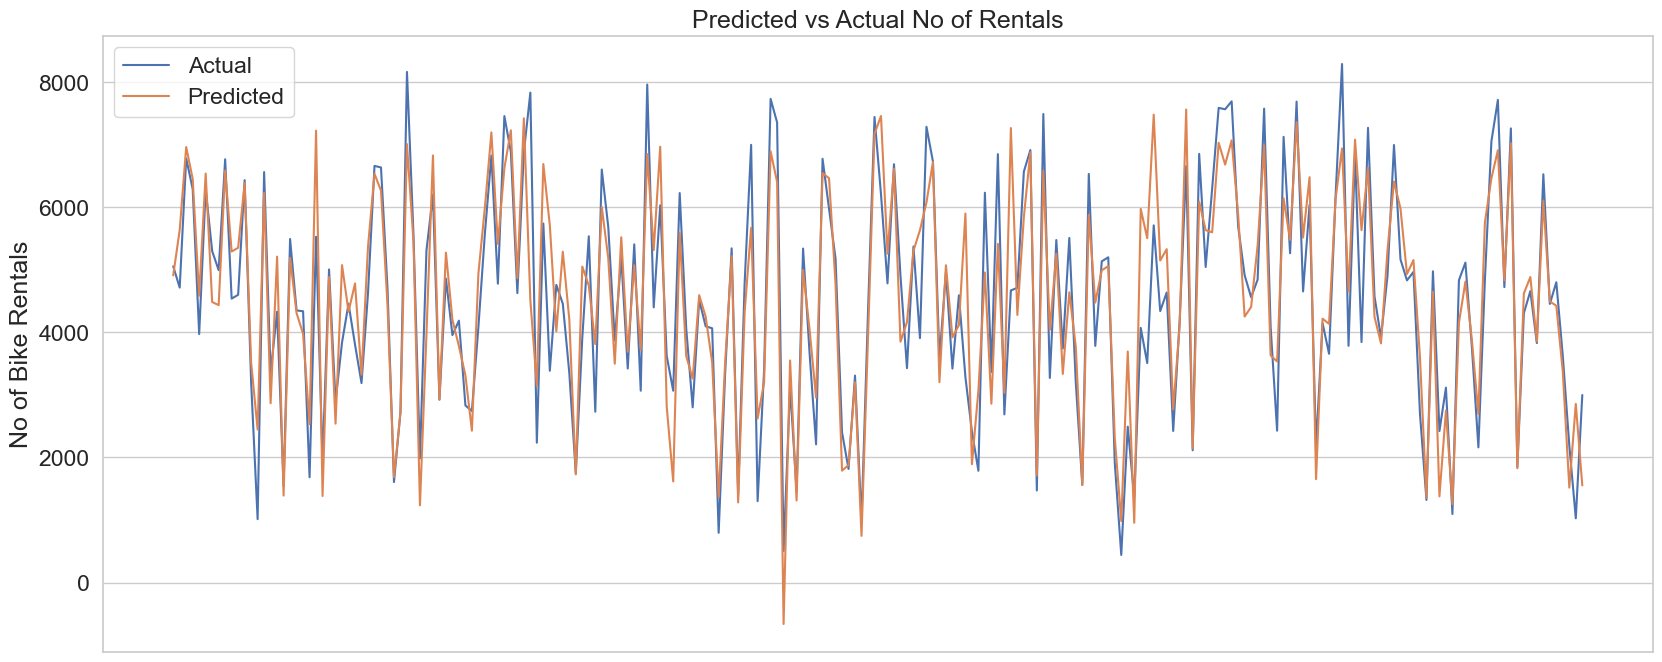

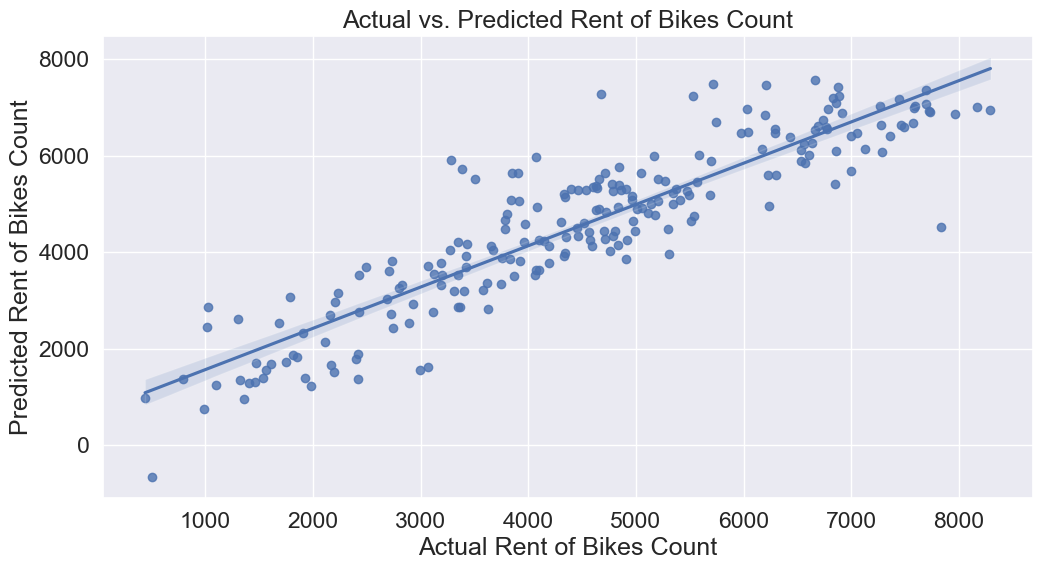

In [35]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

## Check R-square on test data:
### Observations:
* We can observe a good correlation value based on R-square value on test set
* R-square values of train and test doesn't shown much variation.

In [36]:

mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.81
Mean Squared Error 629379.464


# Model Stability:

In [37]:
# R-square using cross validation
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.84076083, 0.84192523, 0.88595519, 0.90357448, 0.69762272,
       0.71609829, 0.84979905, 0.78130097, 0.90482886, 0.8935692 ])

In [38]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.14)


In [39]:
selected_features

array(['yr', 'Sat', 'Sep', 'Nov', 'Light Snow', 'Dec', 'winter', 'Mist',
       'spring', 'windspeed', 'hum', 'temp', 'workingday'], dtype=object)

# Top Features:

In [40]:
Cofficients = round(final_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          3674.84
const         2342.61
yr            2027.49
winter         774.09
Sep            576.40
Sat            448.53
workingday     376.84
Mist          -458.46
Dec           -508.55
Nov           -666.95
windspeed     -845.66
hum           -932.33
spring       -1115.20
Light Snow   -1663.19
dtype: float64

In [41]:
for i in range(0, len(beta)):
    print(beta[i], '*', beta.index[i], end=' + ')


3674.84 * temp + 2342.61 * const + 2027.49 * yr + 774.09 * winter + 576.4 * Sep + 448.53 * Sat + 376.84 * workingday + -458.46 * Mist + -508.55 * Dec + -666.95 * Nov + -845.66 * windspeed + -932.33 * hum + -1115.2 * spring + -1663.19 * Light Snow + 

## Conclusion:

## Best Fit Line

**count = 3674.84 * temp + 2342.61 * const + 2027.49 * yr + 774.09 * winter + 576.4 * Sep + 448.53 * Sat + 376.84 * workingday + -458.46 * Mist + -508.55 * Dec + -666.95 * Nov + -845.66 * windspeed + -932.33 * hum + -1115.2 * spring + -1663.19 * Light Snow**

## Final Assessment:

1. **Temperature (temp)**: Temperature has the most significant positive impact on bike rental demand. As the temperature rises, the demand for bike rentals increases significantly.

2. **Year (yr)**: The year has a positive impact on demand. Over time, there has been an increasing trend in bike rentals.

3. **Winter Season (winter)**: The winter season is associated with increased demand, possibly due to recreational winter activities and holidays.

4. **September (Sep)**: The month of September has a positive influence on demand, indicating higher rentals during this month.

5. **Saturday (Sat)**: Saturdays show a positive impact on demand, suggesting that weekends attract more customers.

6. **Working Day (workingday)**: Working days also have a positive impact on demand, indicating that bikes are in demand for commuting during weekdays.

7. **Mist (Mist)**: Misty weather conditions have a negative impact on demand, with fewer rentals during misty days.

8. **December (Dec)**: December has a negative impact on demand, possibly due to colder weather and holidays.

9. **November (Nov)**: November also shows a negative influence on demand, likely because of decreasing temperatures.

10. **Windspeed (windspeed)**: Windspeed has a negative impact on demand. Strong winds are associated with lower bike rental activity.





